In [3]:
#this work is under developping on python 3.10 environment ,Please ensure to keep python environemnt of version 3.10
!pip install librosa
!pip install pesq
!pip install pystoi
!pip install natsort
import librosa
import numpy as np
from pystoi import stoi
import numpy as np
from scipy.signal import stft

import os
from natsort import natsorted
from pesq import pesq
import numpy as np
import os

# Define the paths of the subfolders
clean_folder = "/work/DNN/clean"
noise_folder = "/work/DNN/noisy"
enhance_folder = "/work/DNN/enhance"

# Initialize an empty list
# to store the LSD values


# read all audio from clean_folder and noise_folder
clean_files = os.listdir(clean_folder)
noise_files = os.listdir(noise_folder)
enhance_files=os.listdir(enhance_folder)

# sort the file names using natural sorting
clean_files = natsorted(clean_files)
noise_files = natsorted(noise_files)
enhance_files = natsorted(enhance_files)
sr=16000
file_num=7



# Read the clean audio file
clean_audio,sr=librosa.load(os.path.join(clean_folder,natsorted(clean_files)[file_num]),sr=sr)
# Read the noise audio file
noise_audio,sr=librosa.load(os.path.join(noise_folder,natsorted(noise_files)[file_num]),sr=sr)
enhance_audio,sr=librosa.load(os.path.join(enhance_folder,natsorted(enhance_files)[file_num]),sr=sr)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Draw two beautiful single-side spectrograms of noisy and enhanced audio .. the spectrogram of noisy audio's dimension should be (129,8) frame area and the spectrogram of clean audio's dimension should be (129,1) ...

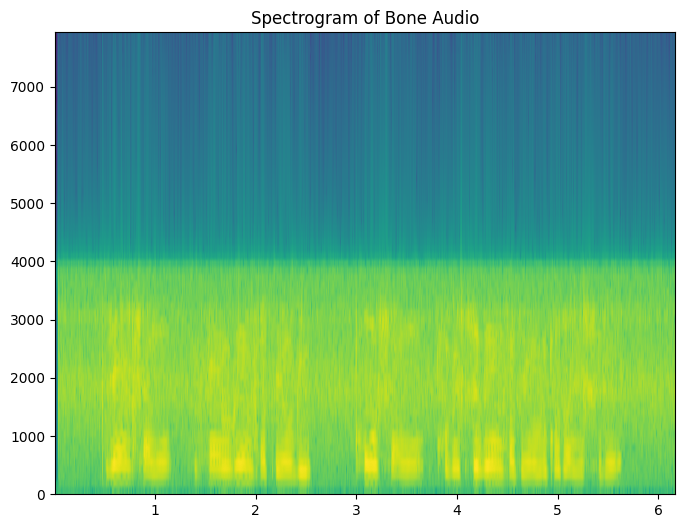

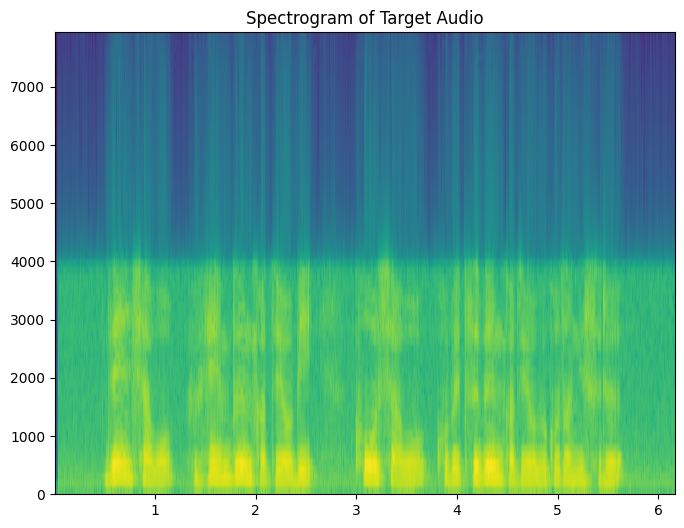

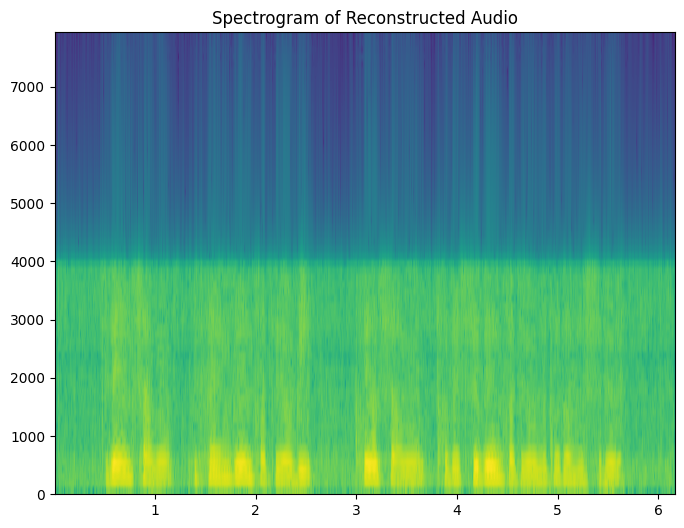

In [35]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Compute the spectrograms
f_clean, t_clean, Sxx_clean = spectrogram(clean_audio, fs=sr, nperseg=129, noverlap=64)
f_noisy, t_noisy, Sxx_noisy = spectrogram(noise_audio, fs=sr, nperseg=129, noverlap=64)
f_enhance, t_enhance, Sxx_enhance = spectrogram(enhance_audio, fs=sr, nperseg=129, noverlap=64)

# Plot the bone audio spectrogram
# Plot the bone audio spectrogram
plt.figure(figsize=(8, 6))
plt.specgram(noise_audio, NFFT=129, Fs=sr, noverlap=64)
plt.title('Spectrogram of Bone Audio')
plt.show()
#plot the Target audio spectrogram
plt.figure(figsize=(8, 6))
plt.specgram(clean_audio, NFFT=129, Fs=sr, noverlap=64)
plt.title('Spectrogram of Target Audio')
plt.show()
#plot the Reconstructed audio spectrogram
plt.figure(figsize=(8, 6))
plt.specgram(enhance_audio, NFFT=129, Fs=sr, noverlap=64)
plt.title('Spectrogram of Reconstructed Audio')
plt.show()


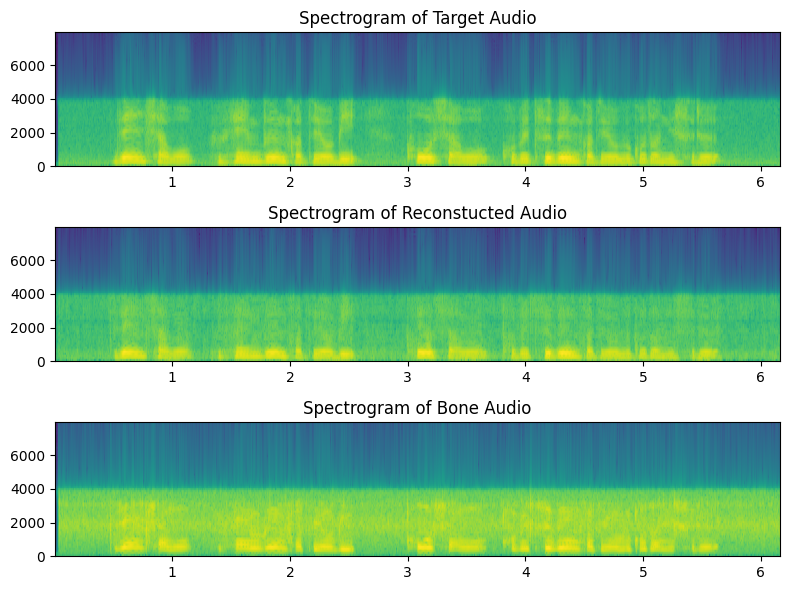

In [36]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Compute the spectrograms
f_clean, t_clean, Sxx_clean = spectrogram(clean_audio, fs=sr, nperseg=129, noverlap=64)
f_noisy, t_noisy, Sxx_noisy = spectrogram(noise_audio, fs=sr, nperseg=129, noverlap=64)
f_enhance, t_enhance, Sxx_enhance = spectrogram(enhance_audio, fs=sr, nperseg=129, noverlap=64)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# Plot the clean audio spectrogram
axs[0].specgram(clean_audio, NFFT=129, Fs=sr, noverlap=64)
axs[0].set_title('Spectrogram of Target Audio')

# Plot the enhanced audio spectrogram
axs[1].specgram(enhance_audio, NFFT=129, Fs=sr, noverlap=64)
axs[1].set_title('Spectrogram of Reconstucted Audio')

# Plot the noisy audio spectrogram
axs[2].specgram(noise_audio, NFFT=129, Fs=sr, noverlap=64)
axs[2].set_title('Spectrogram of Bone Audio')

# Display the plot
plt.tight_layout()
plt.show()


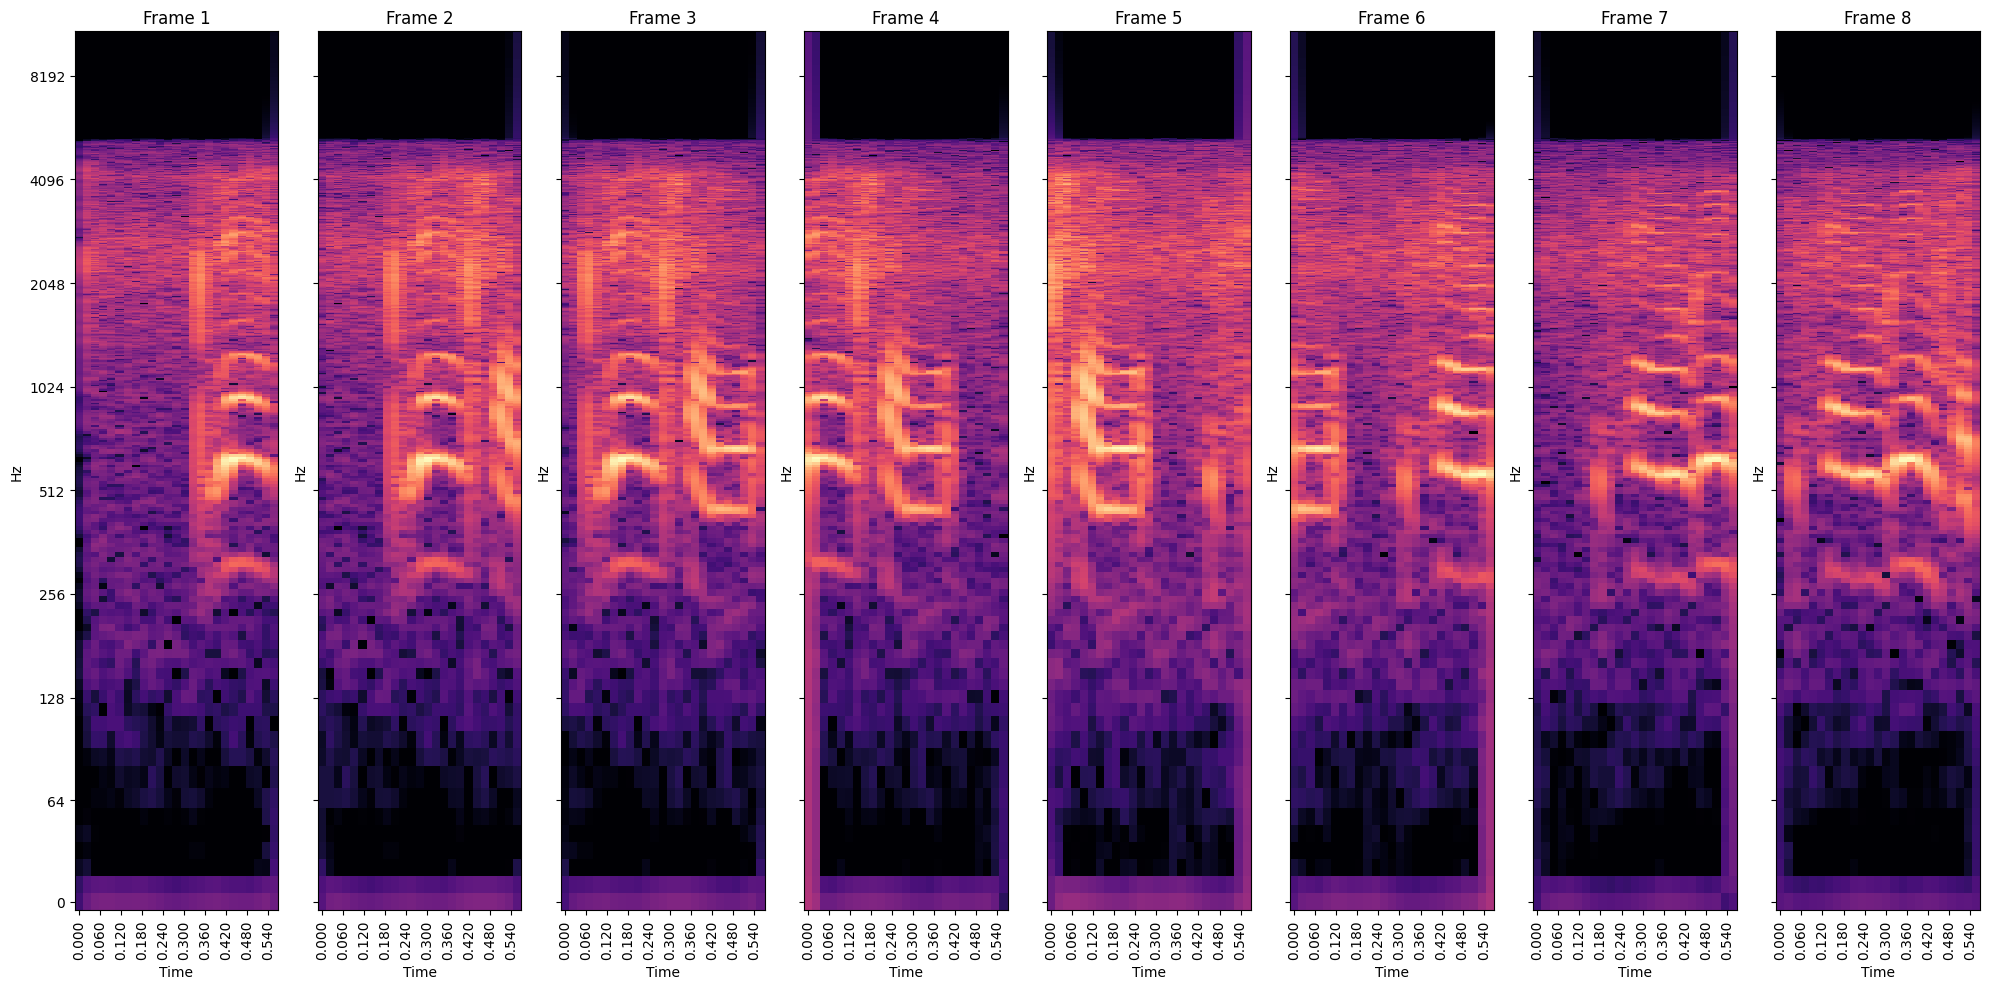

In [32]:
import matplotlib.pyplot as plt
import librosa.display

# Define the number of frames and overlap
num_frames = 8
overlap = 0.75

# Calculate the frame length and hop length
frame_length = int(len(noise_audio) / num_frames)
hop_length = int(frame_length * (1 - overlap))

# Create a figure for the spectrograms
fig, axs = plt.subplots(1, num_frames, figsize=(20, 10), sharey=True)

# Generate and plot the spectrogram for each frame
for i in range(num_frames):
    start = i * hop_length
    end = start + frame_length
    frame = noise_audio[start:end]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(frame)), ref=np.max)
    
    # Plot the spectrogram
    img = librosa.display.specshow(D, ax=axs[i], y_axis='log', x_axis='time')
    axs[i].set_title(f'Frame {i+1}')
    
    # Rotate x-axis labels and make them visible
    plt.setp(axs[i].get_xticklabels(), rotation='vertical', visible=True)

plt.tight_layout()
plt.show()


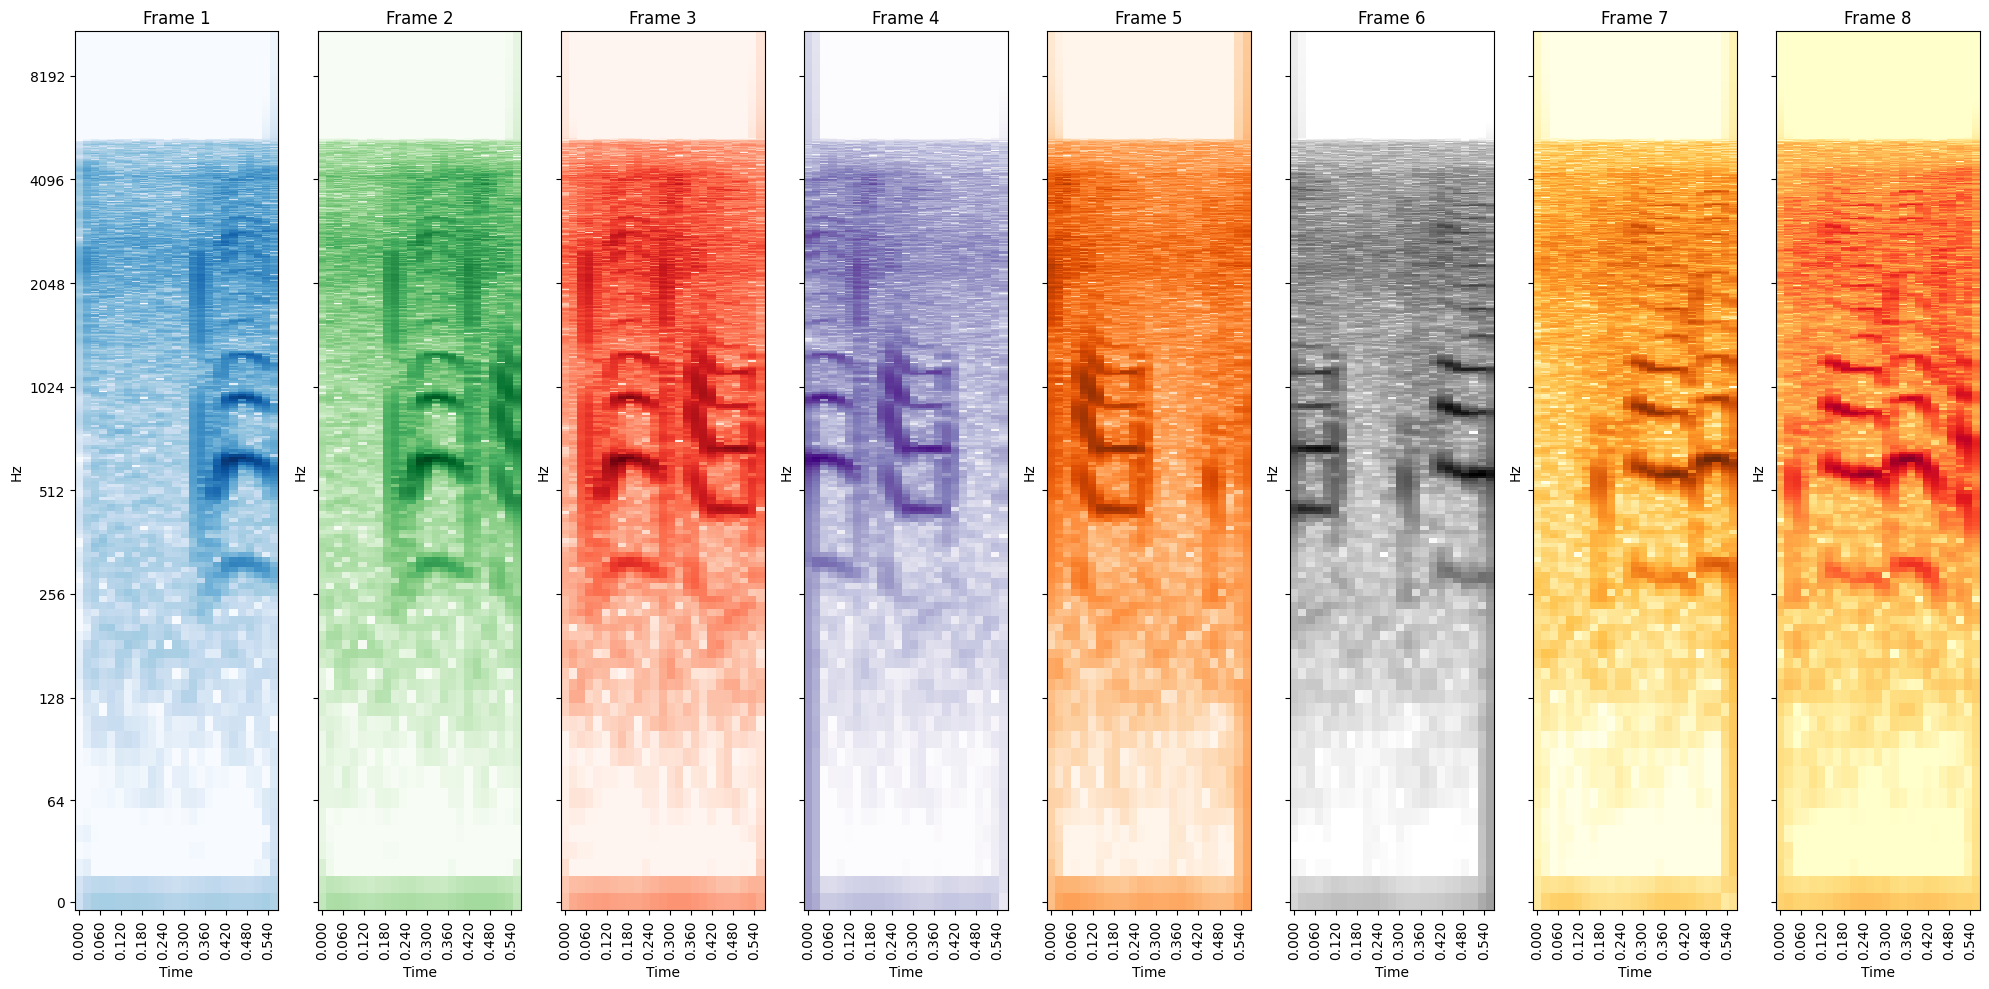

In [33]:
import matplotlib.pyplot as plt
import librosa.display

# Define the number of frames and overlap
num_frames = 8
overlap = 0.75

# Calculate the frame length and hop length
frame_length = int(len(noise_audio) / num_frames)
hop_length = int(frame_length * (1 - overlap))

# Create a figure for the spectrograms
fig, axs = plt.subplots(1, num_frames, figsize=(20, 10), sharey=True)

# Define a list of colormaps
cmaps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'Greys', 'YlOrBr', 'YlOrRd']

# Generate and plot the spectrogram for each frame
for i in range(num_frames):
    start = i * hop_length
    end = start + frame_length
    frame = noise_audio[start:end]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(frame)), ref=np.max)
    
    # Plot the spectrogram with a different colormap for each frame
    img = librosa.display.specshow(D, ax=axs[i], y_axis='log', x_axis='time', cmap=cmaps[i % len(cmaps)])
    axs[i].set_title(f'Frame {i+1}')
    
    # Rotate x-axis labels and make them visible
    plt.setp(axs[i].get_xticklabels(), rotation='vertical', visible=True)

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8932d5f0-83a3-437e-bb6a-bbc3eadd6e87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>